# Batterie: Stromverlauf und Spannungsverlauf
Fahrzeug: 
Datum: 29.05.2022 bis 25.05.2022


In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# du musst ipympl installieren
#!pip install ipympl

# conda install -c conda-forge ipympl
#
# WEnn du jupyter lab (und nicht jupyter notebook) nutzt, musst du noch mehr installieren.
# Mehr Detaills findest hierzu du hier:
# https://towardsdatascience.com/how-to-produce-interactive-matplotlib-plots-in-jupyter-environment-1e4329d71651

# enable interactive visualization 
%matplotlib widget

In [3]:
# read data
df = pd.read_csv("Schenker_FMX_29_09_2022_NL.csv", delimiter=';', skiprows=8)

In [4]:
# Gucke dir die erste fünf oberen Zeilen an
df.head(5)

,Segment,Daten/Stunde,Strom (A),Vbat/Zelle (V),Vbalance/Zelle (V),Temp. (°C),Unnamed: 6
0,1,29.09.2022 09:25:43,-1,2.18,1.0,40,NaN
1,2,29.09.2022 09:25:44,-1,2.18,1.0,40,NaN
2,3,29.09.2022 09:25:45,-1,2.18,1.0,40,NaN
3,4,29.09.2022 09:25:46,-1,2.18,1.0,40,NaN
4,5,29.09.2022 09:25:47,-1,2.18,1.0,40,NaN


In [5]:
# Konvertiere 'DatenStunde' in Datum und speichere diese in eine separate Spalte
df['Daten/StundeAsDt'] = pd.to_datetime(df['Daten/Stunde'], format="%d.%m.%Y %H:%M:%S")

# sort die Daten in steigend bzgl. der neuen Spalte
#df.sort_values(['Daten/StundeAsDt'], inplace=True)

# Berechne neue Felder: 'DauerHour' gibt die Ladedauer in Stunden seit Beginn der Aufzeichnung der Daten
firstDay = pd.to_datetime(df['Daten/StundeAsDt'].min())
firstDayStr =firstDay.strftime('%d.%m.%Y um %H:%M:%S') # Speichere diesen Wert als String ab für Figure Title
df['FirstDay'] = firstDay # schreibe ERgebniss in eine separate Spalte - nicht unbedingt erforderlich
df['DauerHour'] = (df['Daten/StundeAsDt'] - df['FirstDay']) /  pd.Timedelta(hours=1)
#df['DauerMin'] = (df['Daten/StundeAsDt'] - df['FirstDay']) /  pd.Timedelta(minutes=1)

# zeige die wichtigsten Spalten an
rel_cols = ['Segment', 'Daten/Stunde', 'Daten/StundeAsDt', 'FirstDay', 'DauerHour', 'Strom (A)', 'Vbat/Zelle (V)']
df[rel_cols].head(5)

,Segment,Daten/Stunde,Daten/StundeAsDt,FirstDay,DauerHour,Strom (A),Vbat/Zelle (V)
0,1,29.09.2022 09:25:43,2022-09-29 09:25:43,2022-09-29 09:25:43,0.000000,-1,2.18
1,2,29.09.2022 09:25:44,2022-09-29 09:25:44,2022-09-29 09:25:43,0.000278,-1,2.18
2,3,29.09.2022 09:25:45,2022-09-29 09:25:45,2022-09-29 09:25:43,0.000556,-1,2.18
3,4,29.09.2022 09:25:46,2022-09-29 09:25:46,2022-09-29 09:25:43,0.000833,-1,2.18
4,5,29.09.2022 09:25:47,2022-09-29 09:25:47,2022-09-29 09:25:43,0.001111,-1,2.18


Text(44.5, 160, '3 LV')

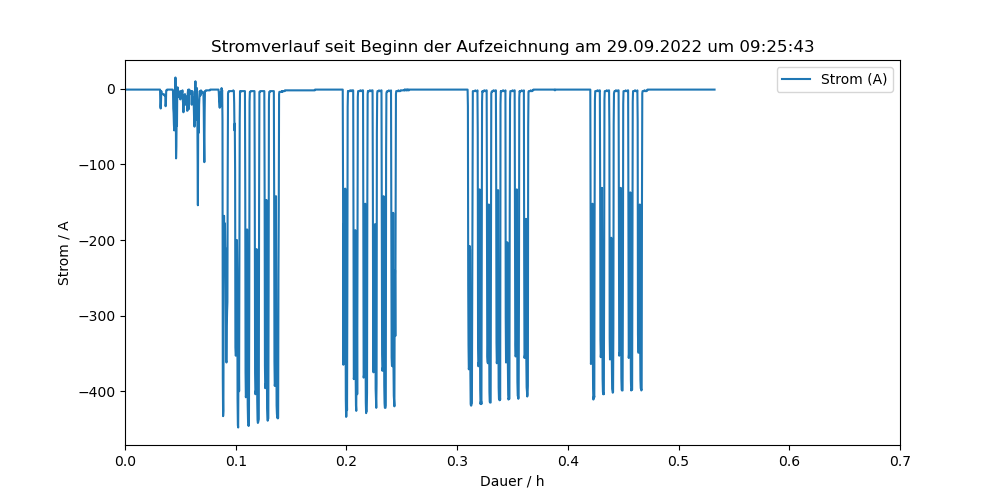

In [6]:
# ************ NEU *****************************
# Plotte: Strom in zeitlichen Verlauf seit Beginn der Aufzeichnung
ax = df.plot( x = 'DauerHour', y = 'Strom (A)', figsize= (10,5), rot=0)
ax.set_title(f'Stromverlauf seit Beginn der Aufzeichnung am {firstDayStr}')
ax.set_xlabel('Dauer / h')
ax.set_ylabel('Strom / A')
ax.set_xlim(0, 0.7)

# Schreibe Text in den Plot in Korrdinatenachsen, d.h. x und y sind aus DauerHour und Strom
ax.text(0.5, 180, '1 LV') # LV = Ladevorgang
ax.text(12.7, 160, '2 LV')
ax.text(44.5, 160, '3 LV') # hier mehr Daten eintragen

In [7]:
#---------------------
# Das kann gelöscht werden: das macht keinen Sinn, da 'Stunde' keine sinnvoler Datentyp hat
#---------------------
#ax = df.plot( x = 'Stunde', y = 'A', figsize= (10,5), rot=45, legend=False)
#ax.set_xlabel('Dauer / h')
#ax.set_ylabel('Strom / A')

# write number of peak via x and y coordinates, wobei die x-Koordinaten die Position des Wertes im Array ist
#ax.text(0.5, 180, '1 peak')
#ax.text(9000, 160, '2 peak')
#ax.text(32000, 160, '3 peak') # usw.


# 1 Ladevorgang

In [8]:
#---------------------
# Alte Version: Kann gelöscht werden
#---------------------
#daten= df.query ('Segment >420& Segment <1280')
#stunde= daten['Stunde']
#spannung =daten['V']
#strom =daten['A']

#plt.figure(figsize=(10,5))
#plt.grid(True)
#plt.ylim(0, 120)

#daten.plot( x = 'Stunde', y = 'A',figsize= (10,5), style= 'r')
#daten["A"].plot( style="r");

#print(daten)
#plt.plot(stunde,spannung, color="blue")
#plt.plot(stunde,strom, color="red")

#daten.plot( x = 'Stunde', y = 'A',figsize= (20,10), style= 'r')
#daten["A"].plot( style="r");

#plt.show()
#print(daten)

In [9]:
# hier kannst du die grenzen für das Segment eingeben und siehst die UNTER/Obere Grenze für die Spalte "DauerHour"

# 1. Ladevorgang: daten= df.query ('Segment >420& Segment <1280')
minDauerHour_1LV = df.loc[df['Segment'] > 0, 'DauerHour'].iloc[0] # LV = Ladevorgang
maxDauerHour_1LV  = df.loc[df['Segment'] < 2000, 'DauerHour'].iloc[-1]

# 2. Ladevorang: daten= df.query ('Segment >9250& Segment <10800')
minDauerHour_2LV = df.loc[df['Segment'] > 0, 'DauerHour'].iloc[0] # LV = Ladevorgang
maxDauerHour_2LV  = df.loc[df['Segment'] < 10800, 'DauerHour'].iloc[-1]

# 3. Ladevorgang: daten= df.query ('Segment >3200& Segment <3700')
# VORSICHT: Überprüfe bitte die Wert - der Plot sieht nicht gut aus
minDauerHour_3LV = df.loc[df['Segment'] > 0, 'DauerHour'].iloc[0] # LV = Ladevorgang
maxDauerHour_3LV  = df.loc[df['Segment'] < 3700, 'DauerHour'].iloc[-1]

print('1. Ladevorgang')
print(f'min DauerHour : {minDauerHour_1LV}' )
print(f'max DauerHour: {maxDauerHour_1LV}' )


print('2. Ladevorgang')
print(f'min DauerHour : {minDauerHour_2LV}' )
print(f'max DauerHour: {maxDauerHour_2LV}' )

print('3. Ladevorgang')
print(f'min DauerHour : {minDauerHour_3LV}' )
print(f'max DauerHour: {maxDauerHour_3LV}' )

1. Ladevorgang
min DauerHour : 0.0
max DauerHour: 0.5325
2. Ladevorgang
min DauerHour : 0.0
max DauerHour: 0.5325
3. Ladevorgang
min DauerHour : 0.0
max DauerHour: 0.5325


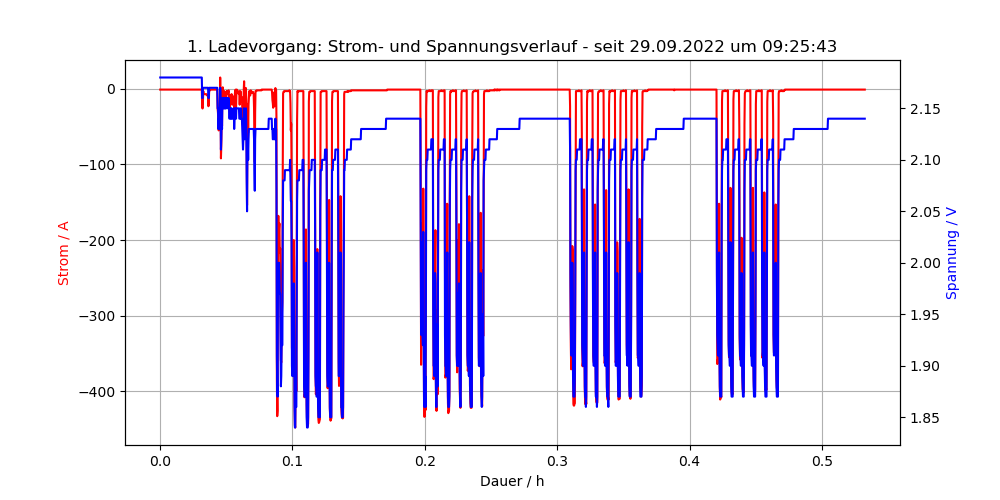

In [10]:
#---------------------
# Du kannst jetzt das Filtern über die Spalte 'DauerHour' machen - du kannst aber auch so lassen.
# die die nötige Zahlen kannst du dir aus dem Plot ganz oben holen oder aus der vorherigen Zelle, wo ich die Wert übersetzt habe
#---------------------

# extrahiere Daten
#daten= df.query ('Segment >420& Segment <1280')
daten= df.query (f'DauerHour > {minDauerHour_1LV} & DauerHour < {maxDauerHour_1LV}')

# plotte Daten: ax1 ist Strom und ax2 ist Spannung
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'1. Ladevorgang: Strom- und Spannungsverlauf - seit {firstDayStr}')
ax1 = daten.plot(ax=ax, x='DauerHour', y='Strom (A)', figsize= (10,5), style= 'r', legend=False)
ax2 = daten.plot(ax=ax, x='DauerHour', y='Vbat/Zelle (V)', style='b', secondary_y=True, legend=False)

# min. und max. Wert auf der x- und y-Achse definieren
#ax1.set_xlim(0.5, 1.9)
#ax1.set_ylim(-10, 170)

# Setze Achsenbeschriftung
ax1.set_xlabel('Dauer / h')
ax1.set_ylabel('Strom / A', color='r')

# Setze Achsenbeschrifutng rechts für die Spannung
ax2.set_ylabel('Spannung / V', color='b')

# setze grid
ax1.grid('on', which='major', axis='x' )
ax1.grid('on', which='major', axis='y')

# schreibe text bzgl. linker Axe - benutze DauerHour und Strom als Koordinate
#ax1.text(0.65, 120, '120 A', color='r') # hier kannst du mehr Daten einfügen

# schreibe text bzgl. rechter Axe - benutze DauerHour und Spannung als Koordinate
#ax2.text(1.76, 58, '58 V', color='b') # hier kannst du mehr Daten einfügen

In [11]:
# take a look at the daten to plot
daten[rel_cols].head(3)

,Segment,Daten/Stunde,Daten/StundeAsDt,FirstDay,DauerHour,Strom (A),Vbat/Zelle (V)
1,2,29.09.2022 09:25:44,2022-09-29 09:25:44,2022-09-29 09:25:43,0.000278,-1,2.18
2,3,29.09.2022 09:25:45,2022-09-29 09:25:45,2022-09-29 09:25:43,0.000556,-1,2.18
3,4,29.09.2022 09:25:46,2022-09-29 09:25:46,2022-09-29 09:25:43,0.000833,-1,2.18


# 2 Ladevorgang

In [12]:
#---------------------
# Alte Version: Du kannst hier ganz analog zu Ladevorgang 1 vorgehen
#--------------
#daten= df.query ('Segment >9250& Segment <10800')
#stunde= daten.Segment
#spannung =daten.V
#strom =daten.A
#
#plt.figure(figsize=(10,5))
#plt.grid(True)
#plt.ylim(0, 120)
#
#plt.plot(stunde,spannung, color="blue")
#plt.plot(stunde,strom, color="red")
#
#plt.show()

Text(14.7, 58, '58 V')

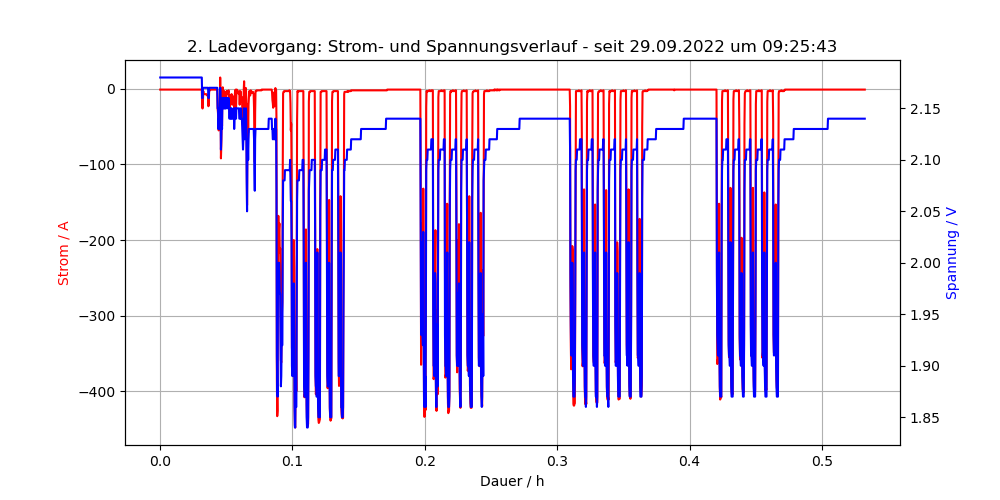

In [13]:
# Alternativ: x-Axe mit DauerHour
#daten= df.query ('Segment >9250& Segment <10800')
daten= df.query (f'DauerHour > {minDauerHour_2LV} & DauerHour < {maxDauerHour_2LV}')

# plot using subplots
fig, ax = plt.subplots(figsize=(9,5))
ax.set_title(f'2. Ladevorgang: Strom- und Spannungsverlauf - seit {firstDayStr}')
ax1 = daten.plot(ax=ax, x='DauerHour', y='Strom (A)', figsize= (10,5), style= 'r', legend=False)
ax2 = daten.plot(ax=ax, x='DauerHour', y='Vbat/Zelle (V)', style='b', secondary_y=True, legend=False)

# xlim
#ax1.set_xlim(0.5, 1.9)

#set ylim
#ax1.set_ylim(0, 130)

# set label
ax1.set_xlabel('Dauer / h')
ax1.set_ylabel('Strom / A', color='r')
ax2.set_ylabel('Spannung / V', color='b')

# set grid
ax1.grid('on', which='major', axis='x' )
ax1.grid('on', which='major', axis='y')

# schreibe text bzgl. linker Axe
ax1.text(13, 150, '150 A', color='r')

# schreibe text bzgl. rechter Axe
ax2.text(14.7, 58, '58 V', color='b')

In [14]:
daten[rel_cols].head()

,Segment,Daten/Stunde,Daten/StundeAsDt,FirstDay,DauerHour,Strom (A),Vbat/Zelle (V)
1,2,29.09.2022 09:25:44,2022-09-29 09:25:44,2022-09-29 09:25:43,0.000278,-1,2.18
2,3,29.09.2022 09:25:45,2022-09-29 09:25:45,2022-09-29 09:25:43,0.000556,-1,2.18
3,4,29.09.2022 09:25:46,2022-09-29 09:25:46,2022-09-29 09:25:43,0.000833,-1,2.18
4,5,29.09.2022 09:25:47,2022-09-29 09:25:47,2022-09-29 09:25:43,0.001111,-1,2.18
5,6,29.09.2022 09:25:48,2022-09-29 09:25:48,2022-09-29 09:25:43,0.001389,-1,2.18


#### Flächenbestimmung

In [15]:
# A. Integral von Strom über DauerHour von DauerHourStart bis DauerHourEnd
# B. Integral von Strom über DauerHour von DauerHourStart bis DauerHourEnd

# Lege hier die Grenzen fest
DauerHourStart = 13.1 # hier kannst du die untere Grenze des Integrals festlegen
DauerHourEnd = 14.6 # hier kannst du die obere Grenze des Integrals festlegen

# Filter die relevanten Zeilen
relevant_rows = (df['DauerHour']>=DauerHourStart) & (df['DauerHour']<=DauerHourEnd) # hier kannst du auch df.query() verwenden
daten= df.loc[relevant_rows, ['DauerHour', 'A', 'V']]

# extrahiere die X-Werte
DauerHourList = daten['DauerHour'].tolist()

# A: Bestimme Integral für Strom
areaStrom = np.trapz(daten['A'].tolist(), x=DauerHourList)

# B: Bestimme Integral für Spannung
areaSpannung = np.trapz(daten['V'].tolist(), x=DauerHourList)

# Printe die Ergebnisse
print(f'Integral von: {DauerHourStart} h')
print(f'         bis: {DauerHourEnd} h')
print(f'  des Stroms über Zeit   = {areaStrom} Ah')
print(f'  der Spannung über Zeit = {areaSpannung} Vh')

KeyError: "['A', 'V'] not in index"

In [ ]:
#----------- 
# Vergleich die exakten Ergebnisse mit geschätzten Werte für die Fläche als Cross-Check
# Ergebnis für Strom passt super mit der obigen Integration mittels numpy
#----------------------
minA = daten['A'].min()
maxA = daten['A'].max()
DeltaDauer = DauerHourEnd - DauerHourStart
print('-'*20)
print(f'Betrachtes Zeitinterval in Stunden: {DeltaDauer}')
print(f'Max. Strom: von {minA} bis {maxA}')
print(f'Obergrenze für Strom: {(maxA+minA)/2*DeltaDauer}') # das ist die Fläsche eines Trapez

# ERgebnis für Spannung passt super mit der obigen Integration mittels numpy
print('-'*20)
minV = daten['V'].min()
maxV = daten['V'].max()
print(f'Max. Strom: von {minV} bis {maxV}')
print(f'Obergrenze für Spannung: {(maxV+minV)/2*DeltaDauer}')

# 3 Ladevorgang

In [ ]:
# das kannst du analog machen
#daten= df.query ('Segment >32000& Segment <37000')

#stunde= daten.Segment
#spannung =daten.V
#strom =daten.A

#plt.figure(figsize=(20,15))
#plt.grid(True)
#plt.ylim(0, 120)

#plt.plot(stunde,spannung, color="blue")
#plt.plot(stunde,strom, color="red")

#plt.show()

In [ ]:
# Alternativ: x-Axe mit DauerHour
#daten= df.query ('Segment >9250& Segment <10800')
daten= df.query (f'DauerHour > {minDauerHour_3LV} & DauerHour < {maxDauerHour_3LV}')

# plot using subplots
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title(f'3. Ladevorgang: Strom- und Spannungsverlauf - seit {firstDayStr}')
ax1 = daten.plot(ax=ax, x='DauerHour', y='A', figsize= (10,5), style= 'r', legend=False)
ax2 = daten.plot(ax=ax, x='DauerHour', y='V', style='b', secondary_y=True, legend=False)

# xlim
#ax1.set_xlim(0.5, 1.9)

#set ylim
#ax1.set_ylim(0, 130)

# set label
ax1.set_xlabel('Dauer / h')
ax1.set_ylabel('Strom / A', color='r')
ax2.set_ylabel('Spannung / V', color='b')

# set grid
ax1.grid('on', which='major', axis='x' )
ax1.grid('on', which='major', axis='y')

# schreibe text bzgl. linker Axe
#ax1.text(13, 150, '150 A', color='r')

# schreibe text bzgl. rechter Axe
#ax2.text(14.7, 58, '58 V', color='b')